**Reading the Saccharomyces cerevisiae S288C model: iMM904**

Latest BiGG Models publication:

King ZA, Lu JS, Dräger A, Miller PC, Federowicz S, Lerman JA, Ebrahim A, Palsson BO, and Lewis NE. BiGG Models: A platform for integrating, standardizing, and sharing genome-scale models (2016) Nucleic Acids Research 44(D1):D515-D522. doi:10.1093/nar/gkv1049

In [3]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('models/iMM904.xml')
model2 = read_sbml_model("model_MODEL1709260000.xml") # MODEL1709260000 DOI: 10.1002/bit.26905 (https://www.ebi.ac.uk/biomodels/MODEL1709260000#Files)

In [4]:
write_sbml_model(model, "model_iMM904.xml") # saving

# The GSMMs at a glance

In [13]:
print("The standard Saccharomyces cerevisiae model contains "+str(len(model.genes))+" genes, "+str(len(model.metabolites))+" metabolites and "+str(len(model.reactions))+" reactions.")
print("The model with a comprehensive iron metabolism contains "+str(len(model2.genes))+" genes, "+str(len(model2.metabolites))+" metabolites and "+str(len(model2.reactions))+" reactions.")

The standard Saccharomyces cerevisiae model contains 905 genes, 1226 metabolites and 1577 reactions.
The model with a comprehensive iron metabolism contains 1226 genes, 3543 metabolites and 4822 reactions.


In [14]:
# Some reactions in the model with a comprehensive iron metabolism are not quite balanced as seen here:
r1 = model2.reactions.get_by_id('r_3143')
r1.check_mass_balance()

{'charge': -2.0, 'H': -1.0, 'O': 3.0, 'P': 1.0}

## Composition of the medium, and annotations of the metabolites

Whereas the standard Saccharomyces cerevisiae S288C model (model1/iMM904) contains a simple media with simple annotations(...)

In [15]:
for i in range (0,10):
    print(model.metabolites.get_by_id(list(model.medium)[i][3:]).name)

Fe2+ mitochondria
D-Glucose
H2O H2O
H+
Potassium
Sodium
Sulfate
Ammonium
O2 O2
Phosphate


(...)The model with a comprehensive iron metabolism (model2) has much more complex metabolite annotations.

In [16]:
for i in range (0,10):
    print(model2.metabolites.get_by_id(list(model2.medium)[i][3:]).name)

(1->3)-beta-D-glucan [boundary]
(R)-carnitine [boundary]
(R)-lactate [boundary]
(R)-mevalonate [boundary]
(R)-pantothenate [boundary]
(R,R)-2,3-butanediol [boundary]
(S)-3-methyl-2-oxopentanoate [boundary]
(S)-lactate [boundary]
(S)-malate [boundary]
1-(sn-glycero-3-phospho)-1D-myo-inositol [boundary]


In [17]:
model.medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 10.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 2.0,
 'EX_pi_e': 999999.0}

In [18]:
model2.medium

{'EX_s_1656': inf,
 'EX_s_1657': inf,
 'EX_s_1658': inf,
 'EX_s_1659': inf,
 'EX_s_1660': inf,
 'EX_s_1661': inf,
 'EX_s_1662': inf,
 'EX_s_1663': inf,
 'EX_s_1664': inf,
 'EX_s_1665': inf,
 'EX_s_1666': inf,
 'EX_s_1667': inf,
 'EX_s_1668': inf,
 'EX_s_1669': inf,
 'EX_s_1670': inf,
 'EX_s_1672': inf,
 'EX_s_1673': inf,
 'EX_s_1674': inf,
 'EX_s_1675': inf,
 'EX_s_1676': inf,
 'EX_s_1677': inf,
 'EX_s_1678': inf,
 'EX_s_1679': inf,
 'EX_s_1680': inf,
 'EX_s_1681': inf,
 'EX_s_1682': inf,
 'EX_s_1683': inf,
 'EX_s_1684': inf,
 'EX_s_1685': inf,
 'EX_s_1686': inf,
 'EX_s_1687': inf,
 'EX_s_1688': inf,
 'EX_s_1689': inf,
 'EX_s_1690': inf,
 'EX_s_1691': inf,
 'EX_s_1692': inf,
 'EX_s_1693': inf,
 'EX_s_1694': inf,
 'EX_s_1695': inf,
 'EX_s_1696': inf,
 'EX_s_1697': inf,
 'EX_s_1698': inf,
 'EX_s_1699': inf,
 'EX_s_1700': inf,
 'EX_s_1701': inf,
 'EX_s_1702': inf,
 'EX_s_1703': inf,
 'EX_s_1704': inf,
 'EX_s_1705': inf,
 'EX_s_1706': inf,
 'EX_s_1707': inf,
 'EX_s_1708': inf,
 'EX_s_1709'

Because many of these are defined as [boundary] we could try a search by [extracellular] metabolites:

In [19]:
for metabolite in model2.metabolites.query('extracellular', 'name'):
    print(metabolite.name)

(1->3)-beta-D-glucan [extracellular]
(R)-carnitine [extracellular]
(R)-lactate [extracellular]
(R)-mevalonate [extracellular]
(R)-pantothenate [extracellular]
(R,R)-2,3-butanediol [extracellular]
(S)-3-methyl-2-oxopentanoate [extracellular]
(S)-lactate [extracellular]
(S)-malate [extracellular]
1-(sn-glycero-3-phospho)-1D-myo-inositol [extracellular]
1-acylglycerophosphocholine [extracellular]
2'-deoxyadenosine [extracellular]
2'-deoxyguanosine [extracellular]
2'-deoxyinosine [extracellular]
2'-deoxyuridine [extracellular]
2-isopropylmalate [extracellular]
2-methylbutanal [extracellular]
2-methylbutanol [extracellular]
2-methylbutyl acetate [extracellular]
2-oxoglutarate [extracellular]
2-phenylethanol [extracellular]
3-methylbutanal [extracellular]
4-aminobenzoate [extracellular]
5-aminolevulinate [extracellular]
5-formyltetrahydrofolic acid [extracellular]
7,8-diaminononanoate [extracellular]
8-amino-7-oxononanoate [extracellular]
9H-xanthine [extracellular]
acetaldehyde [extracellul

## Compartments

Further, the standard yeast has many fewer defined compartments compared to the model with the iron metabolism.

In [20]:
print(model.compartments)
print(model2.compartments)

{'c': 'cytosol', 'e': 'extracellular space', 'm': 'mitochondria', 'x': 'peroxisome/glyoxysome', 'r': 'endoplasmic reticulum', 'v': 'vacuole', 'g': 'golgi apparatus', 'n': 'nucleus'}
{'c_02': 'cell envelope', 'c_03': 'cytoplasm', 'c_06': 'extracellular', 'c_11': 'mitochondrion', 'c_13': 'nucleus', 'c_15': 'peroxisome', 'c_04': 'endoplasmic reticulum', 'c_07': 'Golgi', 'c_09': 'lipid particle', 'c_17': 'vacuole', 'c_01': 'boundary', 'c_10': 'mitochondrial membrane', 'c_05': 'endoplasmic reticulum membrane', 'c_08': 'Golgi membrane', 'c_16': 'vacuolar membrane', 'c_14': 'peroxisomal membrane'}


## "Glucose" query

In [21]:
for metabolite in model2.metabolites.query('glucose', 'name'):
    print(metabolite.name,metabolite.id)

D-glucose [cytoplasm] s_0563
D-glucose [extracellular] s_0565
D-glucose [vacuole] s_0566
D-glucose 1-phosphate [cytoplasm] s_0567
D-glucose 6-phosphate [cytoplasm] s_0568
UDP-D-glucose [cytoplasm] s_1543
D-glucose [boundary] s_1706


In [22]:
model2.metabolites.get_by_id('s_0565')

Metabolite identifier,s_0565
Name,D-glucose [extracellular]
Memory address,0x01d408887c08
Formula,C6H12O6
Compartment,c_06
In 4 reaction(s),"r_1024, r_1166, r_0370, r_1714"


In [23]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

2 Deoxy D glucose C6H12O5
2 Deoxy D glucose 6 phosphate C6H11O8P
Beta D glucose 6 phosphate C6H11O9P
UDPglucose


## The growth rate & media signifigance

In [24]:
print("The growth rate of standard yeast is: "+str(model.optimize().objective_value))
print("The growth rate of Clint Yeastwood is only: "+str(model2.optimize().objective_value))

The growth rate of standard yeast is: 0.28786570370401793
The growth rate of Clint Yeastwood is only: 0.08798018056718143


In [25]:
print(model.objective)
print(model2.objective)

Maximize
1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Maximize
1.0*r_2111 - 1.0*r_2111_reverse_58b69


In [26]:
for reactions in model2.reactions.query('ferrochelatase', 'name'):
    print(reactions.name,reactions.id)

ferrochelatase r_0436


In [27]:
model2.reactions.get_by_id('r_0436')

Reaction identifier,r_0436
Name,ferrochelatase
Memory address,0x01d40928cdc8
Stoichiometry,s_0926 + s_1383 --> s_0712 + 2.0 s_0799 ironII [mitochondrion] + protoporphyrin [mitochondrion] --> ferroheme b [mitochondrion] + 2.0 H+ [mitochondrion]
GPR,YOR176W
Lower bound,0.0
Upper bound,inf


In [28]:
heme_model2 = []
for metabolites in model2.metabolites.query('ferroheme b', 'name'):
    heme_model2.append(metabolites.id)
    print(metabolites.name,metabolites.id)

ferroheme b [mitochondrion] s_0712
ferroheme b [cytoplasm] s_1650
ferroheme b [endoplasmic reticulum] s_1651


In [29]:
model2.metabolites.get_by_id(heme_model2[0])

Metabolite identifier,s_0712
Name,ferroheme b [mitochondrion]
Memory address,0x01d4087f8c08
Formula,C34H30FeN4O4
Compartment,c_11
In 5 reaction(s),"r_1401, r_1400, r_0531, r_1307, r_0436"


In [30]:
model2.add_boundary(model2.metabolites.s_0712, type='demand') # adds the exchange reaction for heme
model.add_boundary(model.metabolites.pheme_m, type='demand') # adds the exchange reaction for heme

Reaction identifier,DM_pheme_m
Name,Protoheme C34H30FeN4O4 demand
Memory address,0x01d40456ed88
Stoichiometry,pheme_m --> Protoheme C34H30FeN4O4 -->
GPR,
Lower bound,0
Upper bound,1000.0


In [31]:
medium = model2.medium
with model2:
    solution = model2.optimize()
    print("CLINT YEASTWOODs Maximum theoretical biomass productivity:", solution.fluxes['r_2111'], '/h')
    #medium['EX_glc__D_e'] = 0
    #medium['EX_ac_e'] = 10
    model2.medium = medium
    model2.objective = model2.reactions.DM_s_0712
    succ_production = model2.optimize().objective_value
    print("CLINT YEASTWOODs maximum theoretical productivity of heme ", succ_production, '[mmol gDW^-1 h^-1]')

CLINT YEASTWOODs Maximum theoretical biomass productivity: 0.08798018056718199 /h
CLINT YEASTWOODs maximum theoretical productivity of heme  0.13457556935817805 [mmol gDW^-1 h^-1]


In [32]:
medium = model.medium
with model:
    solution = model.optimize()
    print("Standard yeast maximum theoretical biomass productivity:", solution.fluxes['BIOMASS_SC5_notrace'], '/h')
    #medium['EX_glc__D_e'] = 0
    #medium['EX_ac_e'] = 10
    model.medium = medium
    model.objective = model.reactions.DM_pheme_m
    succ_production = model.optimize().objective_value
    print("Standard yeast maximum theoretical productivity of heme ", succ_production, '[mmol gDW^-1 h^-1]')

Standard yeast maximum theoretical biomass productivity: 0.2878657037040132 /h
Standard yeast maximum theoretical productivity of heme  0.5501893939393896 [mmol gDW^-1 h^-1]


### media manipulation

Glucose exchanges:

In [33]:
model2_glc_exchanges = []
for i in range (0,len(model2.exchanges)):
    if model2.exchanges[i].id[5:]=='0565':
        model2_glc_exchanges.append(model2.exchanges[i])

In [34]:
model2_glc_exchanges[0]

Reaction identifier,EX_e_0565
Name,EX_e_0565
Memory address,0x01d408fa0088
Stoichiometry,e_0565 <=> UGP1 [cytoplasm] <=>
GPR,
Lower bound,-inf
Upper bound,inf


In [35]:
model.exchanges

[<Reaction EX_epistest_SC_e at 0x1d4083edd48>,
 <Reaction EX_epist_e at 0x1d4083edc88>,
 <Reaction EX_ergst_e at 0x1d408576908>,
 <Reaction EX_ergstest_SC_e at 0x1d408574ec8>,
 <Reaction EX_13BDglcn_e at 0x1d408577088>,
 <Reaction EX_etha_e at 0x1d408576b08>,
 <Reaction EX_2hb_e at 0x1d4085775c8>,
 <Reaction EX_etoh_e at 0x1d4085777c8>,
 <Reaction EX_fe2_e at 0x1d408577f48>,
 <Reaction EX_fecost_e at 0x1d408578988>,
 <Reaction EX_2mbac_e at 0x1d4085788c8>,
 <Reaction EX_2mbald_e at 0x1d408578bc8>,
 <Reaction EX_2mbtoh_e at 0x1d40857a308>,
 <Reaction EX_2mppal_e at 0x1d40857a5c8>,
 <Reaction EX_2phetoh_e at 0x1d40857a688>,
 <Reaction EX_fecostest_SC_e at 0x1d40857a948>,
 <Reaction EX_fmn_e at 0x1d40857ac48>,
 <Reaction EX_3c3hmp_e at 0x1d40857b148>,
 <Reaction EX_3mbald_e at 0x1d40857b5c8>,
 <Reaction EX_for_e at 0x1d40857bbc8>,
 <Reaction EX_fru_e at 0x1d40857bb48>,
 <Reaction EX_3mop_e at 0x1d40857bd88>,
 <Reaction EX_4abut_e at 0x1d40857d888>,
 <Reaction EX_fum_e at 0x1d40857eac8>,
 

In [36]:
model2.reactions.get_by_id("EX_e_0565")

Reaction identifier,EX_e_0565
Name,EX_e_0565
Memory address,0x01d408fa0088
Stoichiometry,e_0565 <=> UGP1 [cytoplasm] <=>
GPR,
Lower bound,-inf
Upper bound,inf


In [37]:
model.reactions.get_by_id('EX_glc__D_e')

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x01d408584208
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-10.0
Upper bound,999999.0


In [38]:
print("with a glucose exchange rate of 10:")

medium = model2.medium
with model2:
    solution = model2.optimize()
    print("CLINT YEASTWOODs Maximum theoretical biomass productivity:", solution.fluxes['r_2111'], '/h')
    medium['EX_e_0565'] = 10
    model2.medium = medium
    model2.objective = model2.reactions.DM_s_0712
    succ_production = model2.optimize().objective_value
    print("CLINT YEASTWOODs maximum theoretical productivity of heme ", succ_production, '[mmol gDW^-1 h^-1]')


medium = model.medium
with model:
    solution = model.optimize()
    print("Standard yeast maximum theoretical biomass productivity:", solution.fluxes['BIOMASS_SC5_notrace'], '/h')
    medium['EX_glc__D_e'] = 10
    model.medium = medium
    model.objective = model.reactions.DM_pheme_m
    succ_production = model.optimize().objective_value
    print("Standard yeast maximum theoretical productivity of heme ", succ_production, '[mmol gDW^-1 h^-1]')

with a glucose exchange rate of 10:
CLINT YEASTWOODs Maximum theoretical biomass productivity: 0.08798018089797256 /h
CLINT YEASTWOODs maximum theoretical productivity of heme  0.13457556935817813 [mmol gDW^-1 h^-1]
Standard yeast maximum theoretical biomass productivity: 0.28786570370401776 /h
Standard yeast maximum theoretical productivity of heme  0.5501893939393941 [mmol gDW^-1 h^-1]


In [39]:
print("with a glucose exchange rate of 100:")

medium = model2.medium
with model2:
    solution = model2.optimize()
    print("CLINT YEASTWOODs Maximum theoretical biomass productivity:", solution.fluxes['r_2111'], '/h')
    medium['EX_e_0565'] = 100
    model2.medium = medium
    model2.objective = model2.reactions.DM_s_0712
    succ_production = model2.optimize().objective_value
    print("CLINT YEASTWOODs maximum theoretical productivity of heme ", succ_production, '[mmol gDW^-1 h^-1]')


medium = model.medium
with model:
    solution = model.optimize()
    print("Standard yeast maximum theoretical biomass productivity:", solution.fluxes['BIOMASS_SC5_notrace'], '/h')
    medium['EX_glc__D_e'] = 100
    model.medium = medium
    model.objective = model.reactions.DM_pheme_m
    succ_production = model.optimize().objective_value
    print("Standard yeast maximum theoretical productivity of heme ", succ_production, '[mmol gDW^-1 h^-1]')

with a glucose exchange rate of 100:
CLINT YEASTWOODs Maximum theoretical biomass productivity: 0.08798018089797215 /h
CLINT YEASTWOODs maximum theoretical productivity of heme  0.13457556935817827 [mmol gDW^-1 h^-1]
Standard yeast maximum theoretical biomass productivity: 0.28786570370401054 /h
Standard yeast maximum theoretical productivity of heme  0.8 [mmol gDW^-1 h^-1]


In [40]:
model.medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 10.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 2.0,
 'EX_pi_e': 999999.0}

Something is wrong with the model that with a comprehensive iron metabolism.

In [41]:
medium = model.medium
with model:
    print("with all exchanges rate unchanged in the medium:")
    solution = model.optimize()
    print("Standard yeast maximum theoretical biomass productivity:", solution.fluxes['BIOMASS_SC5_notrace'], '/h')
    model.medium = medium    
    print("with all exchanges rate of 10 in the medium:")
    for i in range (0,len(list(medium))):
        medium[list(medium)[i]] = 10
    solution = model.optimize()
    print("Standard yeast maximum theoretical biomass productivity:", solution.fluxes['BIOMASS_SC5_notrace'], '/h')

with all exchanges rate unchanged in the medium:
Standard yeast maximum theoretical biomass productivity: 0.28786570370401676 /h
with all exchanges rate of 10 in the medium:
Standard yeast maximum theoretical biomass productivity: 0.28786570370401676 /h


In [42]:
medium = model2.medium
with model2:
    print("with all exchanges rate unchanged in the medium:")
    solution = model2.optimize()
    print("CLINT YEASTWOODs maximum theoretical biomass productivity:", solution.fluxes['r_2111'], '/h')
    model2.medium = medium
    print("with all exchanges rate of 10 in the medium:")
    for i in range (0,len(list(medium))):
        medium[list(medium)[i]] = 10
    solution = model2.optimize()
    print("CLINT YEASTWOODs Maximum theoretical biomass productivity:", solution.fluxes['r_2111'], '/h')

with all exchanges rate unchanged in the medium:
CLINT YEASTWOODs maximum theoretical biomass productivity: 0.08798018089797248 /h
with all exchanges rate of 10 in the medium:
CLINT YEASTWOODs Maximum theoretical biomass productivity: 0.08798018089797248 /h


The model does not appear to respond to changes in the medium. Therefore, it is not an ideal model for us to work with.

# Heme

Our desired product, which we want to increase the flux to as much as possible, is heme:

In [43]:
model.metabolites.pheme_m # desired product

Metabolite identifier,pheme_m
Name,Protoheme C34H30FeN4O4
Memory address,0x01d47fecb108
Formula,
Compartment,m
In 3 reaction(s),"DM_pheme_m, FCLTm, HEMEOSm"


We see that the model does not contain information about the elemental composition of heme.

In [44]:
model.metabolites.pheme_m.annotation

{'sbo': 'SBO:0000247',
 'bigg.metabolite': 'pheme',
 'biocyc': 'META:PROTOHEME',
 'chebi': ['CHEBI:60344',
  'CHEBI:26355',
  'CHEBI:17627',
  'CHEBI:5651',
  'CHEBI:14957'],
 'inchi_key': 'KABFMIBPWCXCRK-RGGAHWMASA-J',
 'kegg.compound': 'C00032',
 'metanetx.chemical': 'MNXM249',
 'reactome.compound': ['917877', '71185', '189444']}

(...)But is is able to pull external references from databases like Kegg.

In [45]:
model.metabolites.pheme_m.reactions

frozenset({<Reaction DM_pheme_m at 0x1d40456ed88>,
           <Reaction FCLTm at 0x1d408682848>,
           <Reaction HEMEOSm at 0x1d4086c4048>})

We see that heme participates in two reactions only (https://www.genome.jp/kegg-bin/show_pathway?sce00860). One involed in its synthesis, and another reaction wherein heme is the substrate.

## The heme biosynthetic pathway

However, we want a lot of Protoheme C34H30FeN4O4 (id: pheme_m). Let's start by figuring out what the flux to heme currently is...

In [46]:
model.optimize().fluxes['FCLTm']

0.0

There is no flux by default. Just like we observed before, heme does not participate in any exchange reactions. Therefore, we will have to add the exchange reaction before we can analyse changes in the flux. 

In [48]:
#model.add_boundary(model.metabolites.pheme_m, type='demand') # adds the exchange reaction for heme
with model: # measures the flux to heme (by default)
    model.objective = model.reactions.FCLTm
    print("The flux of the last reaction of the heme-pathway - and the maximum production of heme is: "+str(model.optimize().objective_value)+" [mmol gDW^-1 h^-1]")

The flux of the last reaction of the heme-pathway - and the maximum production of heme is: 0.5501893939393921 [mmol gDW^-1 h^-1]


We look at the reactions heme is directely involved in... ...and then work backwards to glycine (https://www.genome.jp/kegg-bin/show_pathway?sce00860)

From glycine, eight reactions form the shorthest path (natively) in Baker's yeast. These are those reactions in cronological order. 

In [49]:
heme_1 = model.reactions.get_by_id('ALASm')
heme_2 = model.reactions.get_by_id('PPBNGS')
heme_3 = model.reactions.get_by_id('HMBS')
heme_4 = model.reactions.get_by_id('UPP3S') 
heme_12 = model.reactions.get_by_id('UPPDC1') 
heme_13 = model.reactions.get_by_id('CPPPGO')
heme_14 = model.reactions.get_by_id('PPPGOm') # second to last reaction in the heme biosynthesis
heme_15 = model.reactions.get_by_id('FCLTm')
heme_pathway = [heme_1,heme_2,heme_3,heme_4,heme_12,heme_13,heme_14,heme_15]

In [50]:
model.compartments

{'c': 'cytosol',
 'e': 'extracellular space',
 'm': 'mitochondria',
 'x': 'peroxisome/glyoxysome',
 'r': 'endoplasmic reticulum',
 'v': 'vacuole',
 'g': 'golgi apparatus',
 'n': 'nucleus'}

We see that our model, being a eukaryote, contains more than a few compartments. Heme is synthesised around the mitochondria - with some reactions taking place in the mitochondria and other reactions takning place in the cytosol. 

In [51]:
for i in range (0,len(heme_pathway)):
    with model:
        model.objective = heme_pathway[-1] # calculates the flux with heme as the objective
        print(model.optimize().fluxes[heme_pathway[i].id], heme_pathway[i].id, heme_pathway[i].reaction, heme_pathway[i].name)

4.401515151515137 ALASm gly_m + h_m + succoa_m --> 5aop_m + co2_m + coa_m 5 aminolevulinate synthase
2.2007575757575686 PPBNGS 2.0 5aop_c --> 2.0 h2o_c + h_c + ppbng_c Porphobilinogen synthase
0.5501893939393921 HMBS h2o_c + 4.0 ppbng_c --> hmbil_c + 4.0 nh4_c Hydroxymethylbilane synthase
0.5501893939393921 UPP3S hmbil_c --> h2o_c + uppg3_c Uroporphyrinogen-III synthase
0.5501893939393921 UPPDC1 4.0 h_c + uppg3_c --> 4.0 co2_c + cpppg3_c Uroporphyrinogen decarboxylase (uroporphyrinogen III)
0.5501893939393921 CPPPGO cpppg3_c + 2.0 h_c + o2_c --> 2.0 co2_c + 2.0 h2o_c + pppg9_c Coproporphyrinogen oxidase (O2 required)
0.2750946969696961 PPPGOm 3.0 o2_m + 2.0 pppg9_m --> 6.0 h2o_m + 2.0 ppp9_m Protoporphyrinogen oxidase  mitochondrial
0.5501893939393921 FCLTm fe2_m + ppp9_m --> 2.0 h_m + pheme_m Ferrochelatase  mitochondrial


## Heme productivity

In [52]:
model.metabolites.pheme_m.reactions

frozenset({<Reaction DM_pheme_m at 0x1d40456ed88>,
           <Reaction FCLTm at 0x1d408682848>,
           <Reaction HEMEOSm at 0x1d4086c4048>})

In [53]:
model.reactions.DM_pheme_m

Reaction identifier,DM_pheme_m
Name,Protoheme C34H30FeN4O4 demand
Memory address,0x01d40456ed88
Stoichiometry,pheme_m --> Protoheme C34H30FeN4O4 -->
GPR,
Lower bound,0
Upper bound,1000.0


In [54]:
medium = model.medium
with model:
    #medium['EX_glc__D_e'] = 0
    #medium['EX_ac_e'] = 10
    model.medium = medium
    model.objective = model.reactions.DM_pheme_m
    succ_production = model.optimize().objective_value
    print("Max. heme production [mmol gDW^-1 h^-1]:", succ_production)
    print("Theoretical max. yield [mmol-heme / mmol-[CARBON SOURCE]]:", succ_production / (-1*model.reactions.EX_glc__D_e.flux))

Max. heme production [mmol gDW^-1 h^-1]: 0.5501893939393921
Theoretical max. yield [mmol-heme / mmol-[CARBON SOURCE]]: 0.05501893939393922


## Phenotypic phase plane analysis

In [55]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [56]:
print(model.objective)

Maximize
1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090


In [57]:
ppp_succ = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.BIOMASS_SC5_notrace)
ppp_succ

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,0.287866,3.016363e+00,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.275435,3.045455e+00,NaN,-9.476780
2,EX_glc__D_e,0.0,0.0,NaN,0.263005,3.077947e+00,NaN,-8.953560
3,EX_glc__D_e,0.0,0.0,NaN,0.250574,3.114473e+00,NaN,-8.430341
4,EX_glc__D_e,0.0,0.0,NaN,0.238143,3.155832e+00,NaN,-7.907121
5,EX_glc__D_e,0.0,0.0,NaN,0.225713,3.203053e+00,NaN,-7.383901
6,EX_glc__D_e,0.0,0.0,NaN,0.213282,3.257476e+00,NaN,-6.860681
7,EX_glc__D_e,0.0,0.0,NaN,0.200852,3.320885e+00,NaN,-6.337461
8,EX_glc__D_e,0.0,0.0,NaN,0.188421,3.395707e+00,NaN,-5.814241
9,EX_glc__D_e,0.0,0.0,NaN,0.175991,3.485327e+00,NaN,-5.291022


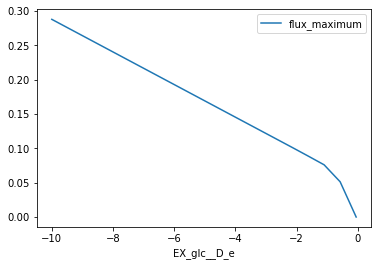

In [58]:
ppp_succ.plot(x='EX_glc__D_e', y='flux_maximum')

Use `production_envelope` to determine the optimal O2 uptake rate.

In [61]:
ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.BIOMASS_SC5_notrace)

In [62]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-2.0

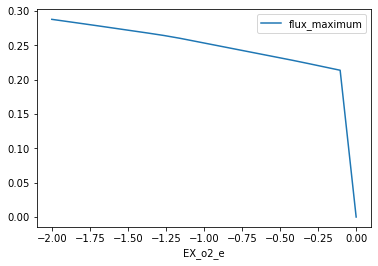

In [63]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum')